# Policy Searchの難しさ

参考：[From policy search to policy gradients](https://rltheory.github.io/w2021-lecture-notes/planning-in-mdps/lec15/)

適当な方策空間上の方策探索はNP困難になることがあります．見てみましょう．

* $\mathcal{S}=\mathcal{A}=[n]$とします．
* 状態遷移は決定的とします．
    * 全ての状態について，行動$a$を選択すると状態$a$に遷移するとします．
* 方策の空間を$[n]$上の確率単体とします．つまり，$[0, 1]^n$に値を取る$n$次元ベクトルとみなせます．
    * つまり，全ての状態で同じ行動の分布しかとれません．

これは状態に依存しないPolicy searchなので，blind policy search 問題と呼ばれます．

このとき，方策$\pi$についての遷移行列は$P_\pi\left(s, s^{\prime}\right)=\pi\left(s^{\prime}\right)$の形式を取り，行列形式で書けば，$P_\pi=\mathbf{1} \pi^\top$です．
明らかに

$$
P_\pi^2=\mathbf{1} \pi^{\top} \mathbf{1} \pi^{\top}=P_\pi
$$

なので，$P_\pi$を何度かけても$P_\pi$です：$P_\pi^t=\mathbf{1} \pi$．よって，$J(\pi)$ を期待リターンとすれば，

$$
J(\pi)=\mu\left(r_\pi+\sum_{t \geq 1} \gamma^t P_\pi^t r_\pi\right)=\mu\left(I+\frac{\gamma}{1-\gamma} \mathbf{1} \pi^{\top}\right) r_\pi
$$

$R_{s, a}=r_a(s)$であるような行列を$R \in[0,1]^{n \times n}$とすれば，$r_\pi=R \pi$になります．これを使うと，

$$
J(\pi)=\mu R \pi+\frac{\gamma}{1-\gamma} \pi^{\top} R \pi
$$

を得ます．つまり，上のMDPでのPolicy Searchは，この二次形式の最大化を図る$\pi$の探索に他なりません．
これは実は**最大独立集合問題**に帰着することができます．

---

グラフ$G-(V, E)$を考えます（自己ループ，二重辺なしの無向グラフとします）．
$G$のうち，独立集合を考えます（[独立集合](https://ja.wikipedia.org/wiki/%E7%8B%AC%E7%AB%8B%E9%9B%86%E5%90%88)参照）．
つまり，$G$の中で互いに隣接していない頂点の集合です．このような独立集合のうち，最大の集合の大きさを考えます．

$$
\alpha(G) = \max\{|V'|: V'\subset \text{Gの独立集合}\}
$$

上で求めた二次形式の最適化問題は，この最大独立集合問題と密接に関係しています．

---

**Motzkin-Strauss (1965)**

$G \in\{0,1\}^{n\times n}$を単純なグラフの[頂点間隣接行列](https://ja.wikipedia.org/wiki/%E9%9A%A3%E6%8E%A5%E8%A1%8C%E5%88%97)とする．
つまり，$(i, j)$がグラフの辺である場合に限って$G_{ij}=1$である．
このとき，$n\times n$の単位行列である$I \in\{0,1\}^{n \times n}$を使って，

$$
\frac{1}{\alpha(G)}=\min _{y \in \mathcal{M}_1([n])} y^{\top}(G+I) y .
$$

である．

---

これを踏まえて，「もし上でみたPolicy searchを多項式時間で解けるアルゴリズムが存在するなら，それは最大独立集合問題を多項式時間で解ける」ことを証明します．
証明には3-正則グラフを使います（つまり，全ての頂点は３つの辺を持ちます）．

$n$個の頂点をもつ3-正則グラフ$G$を考えます．上で見たMDPについて，$R=E-(I+G)$とします．ここで，$G$は頂点間隣接行列，$E$は全て１の行列です（つまり，$E=\mathbf{1 1}^{\top}$です．）
$E$を加えることで，報酬が$[0, 1]$の範囲に制限され，かつバイナリになります．


このとき，グラフは3-正則なので，$\mathbf{1}^{\top}(I+G)=4 \mathbf{1}^{\top}$です．また，$\mu$を一様分布とすれば，

$$
\begin{aligned}
J(\pi) & =\frac{1}{1-\gamma}-\mu(E+I+G) \pi-\frac{\gamma}{1-\gamma} \pi^{\top}(E+I+G) \pi \\
& =\frac{1}{1-\gamma}-\frac{1}{n} \mathbf{1}^{\top}(I+G) \pi-\frac{\gamma}{1-\gamma} \pi^{\top}(I+G) \pi \\
& =\frac{1}{1-\gamma}-\frac{4}{n}-\frac{\gamma}{1-\gamma} \pi^{\top}(I+G) \pi .
\end{aligned}
$$

です．よって，適当な定数$m$について，

$$
\max _{\pi \in \mathcal{M}_1([n])} J(\pi)=\frac{1}{1-\gamma}-\frac{4}{n}-\frac{\gamma}{1-\gamma} \frac{1}{\alpha(G)} \geq \frac{1}{1-\gamma}-\frac{4}{n}-\frac{\gamma}{1-\gamma} \frac{1}{m}
$$

が成立するのは$\alpha(G) \geq m$のときだけです．

以上から，適当な定数$\alpha$について，$J(\pi)\geq \alpha$ を判定するのは，最大独立集合問題と同等もしくはそれ以上に難しいことがわかります．
よってこのPolicy search問題はNP困難です．

---


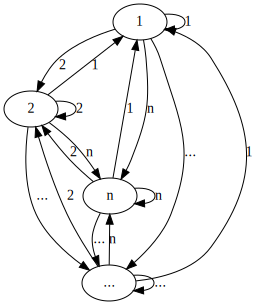

In [7]:
# 状態と遷移の関係．行動は固定されてることに注意

from graphviz import Digraph

g = Digraph('G')

g.node("1")
g.node("2")
g.node("...")
g.node("n")

g.edge("1", "2", label="2")
g.edge("2", "2", label="2")
g.edge("...", "2", label="2")
g.edge("n", "2", label="2")

g.edge("1", "1", label="1")
g.edge("2", "1", label="1")
g.edge("...", "1", label="1")
g.edge("n", "1", label="1")

g.edge("1", "n", label="n")
g.edge("2", "n", label="n")
g.edge("...", "n", label="n")
g.edge("n", "n", label="n")

g.edge("1", "...", label="...")
g.edge("2", "...", label="...")
g.edge("...", "...", label="...")
g.edge("n", "...", label="...")

g